# COMPARISON TREECODE VS NBODY - 2000 PARTICLES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
from scipy.integrate import quad
from scipy.interpolate import splev, splrep

In [ ]:
fp = open('res_treecode2000.txt','r')

Npart = int(fp.readline())
Nd = int(fp.readline())

fp.seek(0) # go back to the beginning of the file

Nlines = len(fp.readlines()) # the length of the output of fp.readlines()
                             # is exactly the number of lines in the file
fp.close() # close the file

print("Npart =",Npart)
print("Nd =",Nd)
print("Nlines =",Nlines)

Nlines_in_snapshot = 3 + 3*Npart
Nsnapshots = Nlines//Nlines_in_snapshot
print("Nlines_in_snapshot =", Nlines_in_snapshot)
print("Nsnapshots =",Nsnapshots)

orbits_array = np.empty([Nsnapshots,Npart,Nd])
v = np.empty([Nsnapshots,Npart,Nd])
print(orbits_array.shape)
print(v.shape)

# read the masses:
m = np.genfromtxt('res_treecode2000.txt',skip_header=3,max_rows=Npart)

# read the times, positions and velocities
time = np.empty([Nsnapshots])

for i_snapshot in range(Nsnapshots):
    initial_line = i_snapshot*Nlines_in_snapshot
    initial_line_m = initial_line + 3
    initial_line_x = initial_line_m+Npart
    initial_line_v = initial_line_x+Npart
    time[i_snapshot] = np.genfromtxt('res_treecode2000.txt',skip_header=initial_line+2,max_rows=1)
    orbits_array[i_snapshot] = np.genfromtxt('res_treecode2000.txt',skip_header=initial_line_x,max_rows=Npart)
    v[i_snapshot] = np.genfromtxt('res_treecode2000.txt',skip_header=initial_line_v,max_rows=Npart)

Npart = 2000
Nd = 3
Nlines = 1206603
Nlines_in_snapshot = 6003
Nsnapshots = 201
(201, 2000, 3)
(201, 2000, 3)


In [ ]:
warnings.filterwarnings("ignore")
orbits = np.genfromtxt("res_sphere_collapse_time_2000.txt", delimiter = ' ', usecols = range(1,7), invalid_raise=False)
dati = np.genfromtxt("res_sphere_collapse_time_2000.txt", delimiter = ' ', usecols = range(0,1), invalid_raise=False)

time_nbody = []
for t in dati:
    if t >0.004:
        if t < 299:
            time_nbody.append(t)

num_particles = 2000
num_orbits = len(orbits) // num_particles
a = 10
orbits_list = [[] for _ in range(num_particles)]

rho_0 = 1/(4/3*np.pi*(a)**3)

for i in range(num_particles):
    for j in range(num_orbits):
        index = j * num_particles + i
        if index < len(orbits):
            orbits_list[i].append(orbits[index][0:3])

orbits_array_nbody = [np.array(orbit) for orbit in orbits_list]
print(len(time_nbody))

200


### 1. t(r) analitical vs t(r) simulated

In [ ]:
#64, 84, 875
chosen_orbit = 36

In [ ]:
a = 10
rho_0 = 1/(4/3*np.pi*(a)**3)

In [ ]:
#calcolo evoluzione di una singola particella all'interno della shell
raggio_treecode = []
for idx, step in enumerate(orbits_array):
    raggio_treecode.append(np.sqrt(step[chosen_orbit][0]**2 + step[chosen_orbit][1]**2+step[chosen_orbit][2]**2))
    if idx == 0:
        #print(raggio[0])
        raggio_iniziale = raggio_treecode[0]

#funzione per calcolo tempo analitico
def tempo_analitico(r):
    integral = quad(lambda x: np.sqrt(x)/np.sqrt(1-x), 1, r/raggio_iniziale)[0]
    return -np.sqrt(3/(8*np.pi*1*rho_0))*integral

#calcolo t(r) analitico
t_treecode = []
for radius in raggio_treecode:
    t_treecode.append(tempo_analitico(radius))

In [ ]:
#calcolo evoluzione di una singola particella all'interno della shell
raggio_nbody = []
for idx, step in enumerate(orbits_array_nbody[chosen_orbit]):
    raggio_nbody.append(np.sqrt(step[0]**2 + step[1]**2+step[2]**2))
    if idx == 0:
        #print(raggio[0])
        raggio_iniziale_nbody = raggio_nbody[0]

#funzione per calcolo tempo analitico
def tempo_analitico_nbody(r):
    integral = quad(lambda x: np.sqrt(x)/np.sqrt(1-x), 1, r/raggio_iniziale)[0]
    return -np.sqrt(3/(8*np.pi*1*rho_0))*integral

#calcolo t(r) analitico
t_nbody = []
for radius in raggio_nbody:
    t_nbody.append(tempo_analitico_nbody(radius))

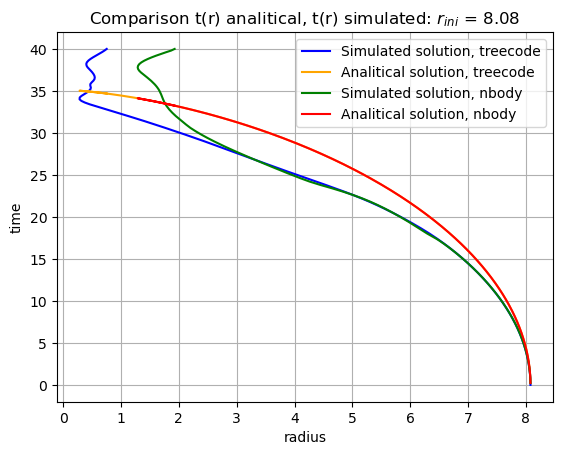

In [ ]:
plt.plot(raggio_treecode, time, color = 'blue', label = 'Simulated solution, treecode')
plt.plot(raggio_treecode, t_treecode, color = 'orange', label = 'Analitical solution, treecode')
plt.xlabel('radius')
plt.ylabel('time')
plt.plot(raggio_nbody, time_nbody, color = 'green', label = 'Simulated solution, nbody')
plt.plot(raggio_nbody, t_nbody, color = 'red', label = 'Analitical solution, nbody')
plt.grid()
plt.legend()
plt.title(r'Comparison t(r) analitical, t(r) simulated: $r_{ini}$ = %.02f' %raggio_iniziale)
plt.show()

### 2. $t(r_{mean})$

In [ ]:
#raggio minimo e raggio massimo iniziali
r_min = 1.5
r_max = 2.5
list_indices = []

#ciclo per salvare indice delle particelle che sono all'interno della shell iniziale
for idx, particle in enumerate(orbits_array[0]):
    r = np.sqrt(particle[0]**2+particle[1]**2+particle[2]**2)
    if (r> r_min) and (r< r_max):
        list_indices.append(idx)

#lista per salvare l'evoluzione del raggio medio
r_medio = []
i = 0
#ciclo per calcolare ad ogni tempo il raggio medio delle particelle
while i < len(time):
    r_var = 0
    for idx in list_indices:
          r_var = r_var + np.sqrt(orbits_array[i][idx][0]**2+orbits_array[i][idx][1]**2+orbits_array[i][idx][2]**2)
    r_medio.append(r_var/len(list_indices))
    i = i+1

#funzione per calcolare il tempo analitico
def tempo_analitico(r):
    integral = quad(lambda x: np.sqrt(x)/np.sqrt(1-x), 1, r/r_medio[0])[0]
    return -np.sqrt(3/(8*np.pi*1*rho_0))*integral

#ciclo per salvare il tempo analitico corrispondente a ciascun raggio
t = []
for radius in r_medio:
    t.append(tempo_analitico(radius))

In [ ]:
list_indices = []
for idx,particle in enumerate(orbits_array_nbody):
    r = np.sqrt(particle[0][0]**2+particle[0][1]**2+particle[0][2]**2)
    if (r> r_min) and (r< r_max):
        list_indices.append(idx)

r_medio_nbody = []
i = 0
while i < len(time_nbody):
    r_var = 0
    for idx in list_indices:
          r_var = r_var + np.sqrt(orbits_array_nbody[idx][i][0]**2+orbits_array_nbody[idx][i][1]**2+orbits_array_nbody[idx][i][2]**2)
    r_medio_nbody.append(r_var/len(list_indices))
    i = i+1

def tempo_analitico(r):
    integral = quad(lambda x: np.sqrt(x)/np.sqrt(1-x), 1, r/r_medio_nbody[0])[0]
    return -np.sqrt(3/(8*np.pi*1*rho_0))*integral

t_nbody = []
for radius in r_medio_nbody:
    t_nbody.append(tempo_analitico(radius))

In [ ]:
#calcolo evoluzione di una singola particella all'interno della shell
raggio_single = []
for idx, step in enumerate(orbits_array):
    raggio_single.append(np.sqrt(step[list_indices[len(list_indices)-1]][0]**2 + step[list_indices[len(list_indices)-1]][1]**2+step[list_indices[len(list_indices)-1]][2]**2))
    if idx == 0:
        #print(raggio[0])
        raggio_iniziale_single = raggio_single[0]

raggio_single_nbody = []
for idx, step in enumerate(orbits_array_nbody[list_indices[len(list_indices)-1]]):
    raggio_single_nbody.append(np.sqrt(step[0]**2 + step[1]**2+step[2]**2))
    if idx == 0:
        #print(raggio[0])
        raggio_iniziale_nbody = raggio_single_nbody[0]

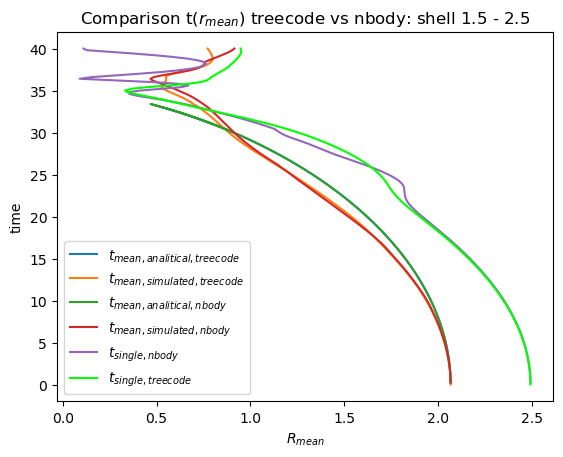

In [ ]:
plt.plot(r_medio, t, label = r'$t_{mean, analitical, treecode}$')
plt.plot(r_medio, time, label = r'$t_{mean, simulated, treecode}$')
plt.plot(r_medio_nbody, t_nbody, label = r'$t_{mean, analitical, nbody}$')
plt.plot(r_medio_nbody, time_nbody, label = r'$t_{mean, simulated, nbody}$')
plt.plot(raggio_single_nbody, time_nbody, label = r'$t_{single, nbody}$')
plt.plot(raggio_single, time, color = 'lime', label = r'$t_{single, treecode}$')
plt.legend()
plt.xlabel(r'$R_{mean}$')
plt.ylabel(r'time')
plt.title(r'Comparison t($r_{mean}$) treecode vs nbody: shell %.01f - %.01f' %(r_min, r_max))
plt.show()

### $t(r_{mean})$ for the total sphere

In [ ]:
#calcolo evoluzione raggio medio per l'intera sfera
r_medio = []
i = 0
#i indice per il tempo, j indice per il numero delle particelle
while i < len(time):
    r_var = 0
    j = 0
    while j < Npart:
          r_var = r_var + np.sqrt(orbits_array[i][j][0]**2+orbits_array[i][j][1]**2+orbits_array[i][j][2]**2)
          j = j+1
    r_medio.append(r_var/Npart)
    i = i+1

#funzione per calcolo tempo analitico
def tempo_analitico(r):
    integral = quad(lambda x: np.sqrt(x)/np.sqrt(1-x), 1, r/r_medio[0])[0]
    return -np.sqrt(3/(8*np.pi*1*rho_0))*integral

#calcolo t(r) analitico
t = []
for radius in r_medio:
    t.append(tempo_analitico(radius))


r_medio_nbody = []
i = 0
while i < len(time_nbody):
    r_var = 0
    j = 0
    while j < num_particles:
          r_var = r_var + np.sqrt(orbits_array_nbody[j][i][0]**2+orbits_array_nbody[j][i][1]**2+orbits_array_nbody[j][i][2]**2)
          j = j+1
    r_medio_nbody.append(r_var/num_particles)
    i = i+1

t_nbody = []
for radius in r_medio_nbody:
    t_nbody.append(tempo_analitico(radius))


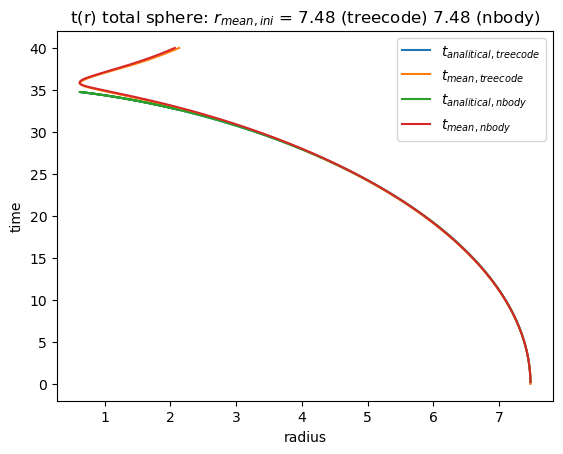

In [ ]:
plt.plot(r_medio, t, label = r'$t_{analitical, treecode}$')
plt.plot(r_medio, time, label = r'$t_{mean, treecode}$')
plt.plot(r_medio_nbody, t_nbody, label = r'$t_{analitical, nbody}$')
plt.plot(r_medio_nbody, time_nbody, label = r'$t_{mean, nbody}$')
plt.title(r't(r) total sphere: $r_{mean, ini}$ = %.02f (treecode) %.02f (nbody)' %(r_medio[0], r_medio_nbody[0]))
plt.xlabel('radius')
plt.ylabel('time')
plt.legend()
plt.show()

### Mass check

In [ ]:
#funzione per calcolare t(r) analiticamente
def tempo_analitico(r, r_ini):
    integral = quad(lambda x: np.sqrt(x)/np.sqrt(1-x), 1, r/r_ini)[0]
    return -np.sqrt(3/(8*np.pi*1*rho_0))*integral

#scelta raggi shell
r_min_0 = 5
r_max_0 = 6

#array di raggi sul quale fare interpolazione per r_min:
raggio = np.linspace(0,r_min_0, 1000)
raggio = raggio[::-1]
raggio = np.array(raggio)

#tempi su cui fare interpolazione per r_min:
tempo = []
for rad in raggio:
    tempo.append(tempo_analitico(rad, r_min_0))
tempo[0] = 0 #correzione del nan che viene da scipy.integrate

#interpolazione: splrep mi crea interpolazione di r(t) per r_min,
#splev mi trova r(t_fissato) partendo dall'interpolazione per r_min
tck_min = splrep(tempo, raggio)
r_analitico_min = splev(tempo, tck_min)

#array di raggi sul quale fare interpolazione per r_max:
raggio = np.linspace(0,r_max_0, 1000)
raggio = raggio[::-1]
raggio = np.array(raggio)

#tempi su cui fare interpolazione per r_max:
tempo = []
for rad in raggio:
    tempo.append(tempo_analitico(rad, r_max_0))
tempo[0] = 0 #correzione del nan che viene da scipy.integrate

#interpolazione: splrep mi crea interpolazione di r(t) per r_max,
#splev mi trova r(t_fissato) partendo dall'interpolazione per r_max
tck_max = splrep(tempo, raggio)
r_analitico_max = splev(tempo, tck_max)

#liste per salvare il numero di particelle e l'evoluzione dei raggi della shell
count_list = []
r_interp_min_list = []
r_interp_max_list = []

#ciclo per conto particelle
for idx, t in enumerate(time):
    count = 0 #setto conteggio a 0 all'inizio del nuovo step in tempo
    #calcolo valore di r_min, r_max al dato step temporale
    r_interp_min =splev(t, tck_min)
    r_interp_max = splev(t, tck_max)
    #salvo i valori di r_min, r_max
    r_interp_min_list.append(r_interp_min)
    r_interp_max_list.append(r_interp_max)

    #ciclo per calcolare numero di particelle all'interno di tali raggi
    for step in orbits_array[idx]:
        rad = np.sqrt(step[0]**2 + step[1]**2+step[2]**2)
        if (rad <= r_interp_max) and (rad >= r_interp_min):
            count = count+1
    #salvataggio del numero di particelle
    count_list.append(count)

In [ ]:
#liste per salvare il numero di particelle e l'evoluzione dei raggi della shell
count_list_nbody = []
r_interp_min_list_nbody = []
r_interp_max_list_nbody = []

#ciclo per conto particelle
for idx, t in enumerate(time_nbody):
    count = 0 #setto conteggio a 0 all'inizio del nuovo step in tempo
    #calcolo valore di r_min, r_max al dato step temporale
    r_interp_min_nbody =splev(t, tck_min)
    r_interp_max_nbody = splev(t, tck_max)
    #salvo i valori di r_min, r_max
    r_interp_min_list_nbody.append(r_interp_min_nbody)
    r_interp_max_list_nbody.append(r_interp_max_nbody)

    #ciclo per calcolare numero di particelle all'interno di tali raggi
    for step in orbits_array_nbody:
        rad = np.sqrt(step[idx][0]**2 + step[idx][1]**2+step[idx][2]**2)
        if (rad <= r_interp_max_nbody) and (rad >= r_interp_min_nbody):
            count = count+1
    #salvataggio del numero di particelle
    count_list_nbody.append(count)

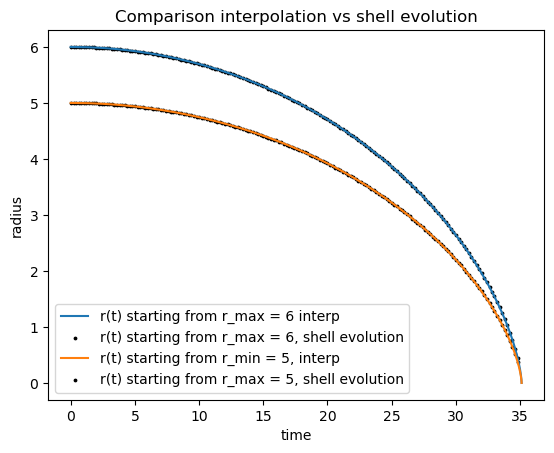

In [ ]:
plt.plot(tempo, r_analitico_max, label = 'r(t) starting from r_max = '+ str(r_max_0) +' interp')
plt.scatter(time[0:175], r_interp_max_list[0:175], s = 3, color = 'black', label = 'r(t) starting from r_max = '+str(r_max_0)+', shell evolution')
plt.plot(tempo, r_analitico_min, label = 'r(t) starting from r_min = '+str(r_min_0)+', interp')
plt.scatter(time[0:175], r_interp_min_list[0:175], s=3, color = 'black', label = 'r(t) starting from r_max = '+str(r_min_0)+', shell evolution')
plt.title('Comparison interpolation vs shell evolution')
plt.xlabel('time')
plt.ylabel('radius')
plt.legend()
plt.show()

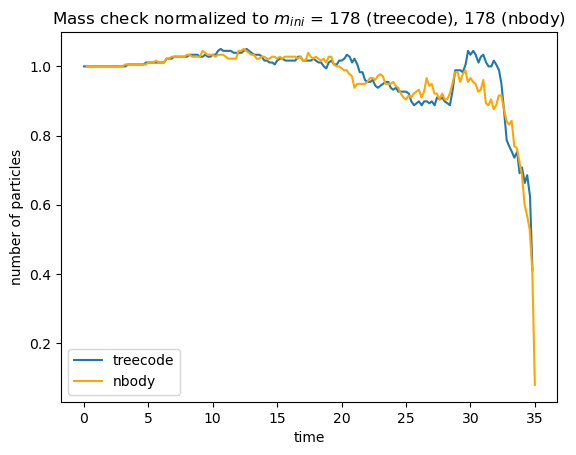

In [ ]:
plt.plot(time[0:175], np.array(count_list[0:175])/count_list[0], label='treecode')
plt.plot(time_nbody[0:175], np.array(count_list_nbody[0:175])/count_list_nbody[0], color = 'orange', label = 'nbody')
plt.title(r'Mass check normalized to $m_{ini}$ = %.0f (treecode), %.0f (nbody)' % (count_list[0], count_list_nbody[0]))
plt.xlabel('time')
plt.ylabel('number of particles')
plt.legend()
plt.show()